Xavg
(2,)
[2.01171205 1.02428091]
(2, 2)
[[-1.00019717 -0.43309387]
 [-1.73961011  0.24900939]]
pca
(2, 2)
[[-1.00019717 -0.43309387]
 [-1.73961011  0.24900939]]
pc
[2.01171205 1.01151489]
[ 1.02428091 -0.7153292 ]
[2.01171205 1.57861818]
[1.02428091 1.2732903 ]
pca
[ 2.01171205 -1.00019717]
[ 1.02428091 -1.73961011]
[ 2.01171205 -0.43309387]
[1.02428091 0.24900939]


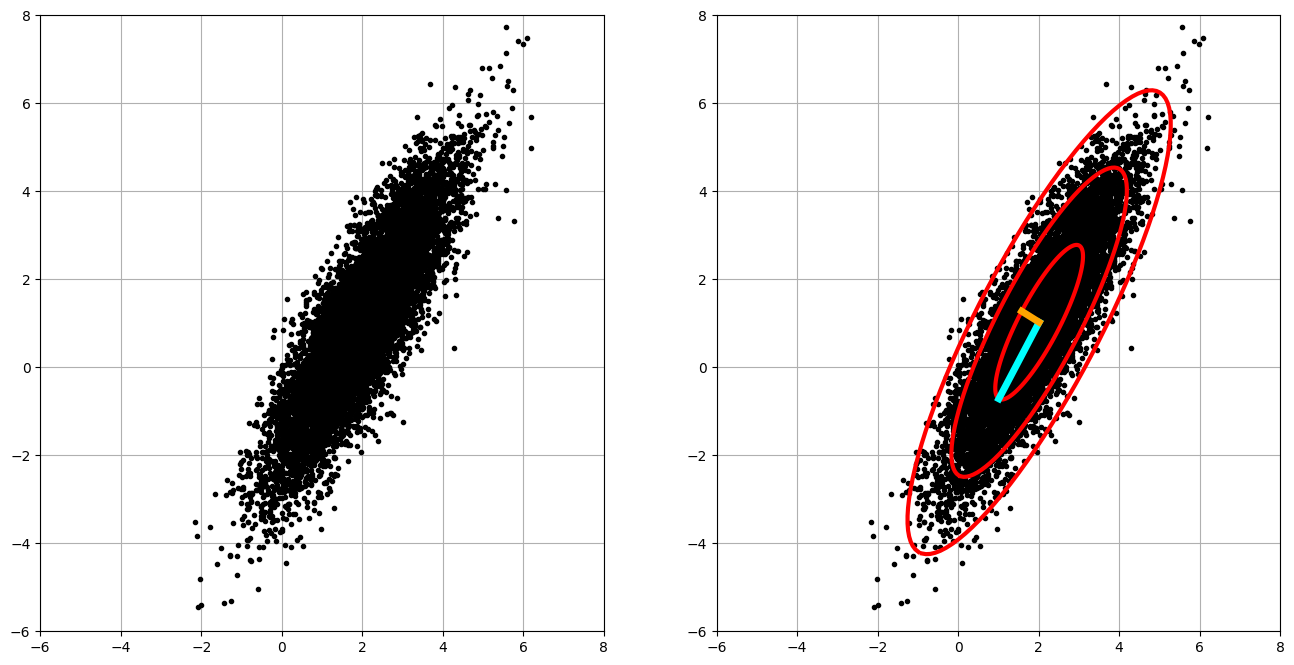

In [2]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 8]

xC = np.array([2, 1])      # Center of data (mean)
sig = np.array([2, 0.5])   # Principal axes

theta = np.pi/3            # Rotate cloud by pi/3

R = np.array([[np.cos(theta), -np.sin(theta)],     # Rotation matrix
              [np.sin(theta), np.cos(theta)]])

nPoints = 10000            # Create 10,000 points
X = R @ np.diag(sig) @ np.random.randn(2,nPoints) + np.diag(xC) @ np.ones((2,nPoints))

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(X[0,:],X[1,:], '.', color='k')
ax1.grid()
plt.xlim((-6, 8))
plt.ylim((-6,8))

## f_ch01_ex03_1b

Xavg = np.mean(X,axis=1)                  # Compute mean
B = X - np.tile(Xavg,(nPoints,1)).T       # Mean-subtracted data

# Find principal components (SVD)
if True:
    U, S, VT = np.linalg.svd(B/np.sqrt(nPoints),full_matrices=False)
else:
    U, S, VT = np.linalg.svd(B,full_matrices=False)
    U = U / np.sqrt(nPoints)
    VT = VT / np.sqrt(nPoints)

ax2 = fig.add_subplot(122)
ax2.plot(X[0,:],X[1,:], '.', color='k')   # Plot data to overlay PCA
ax2.grid()
plt.xlim((-6, 8))
plt.ylim((-6,8))

theta = 2 * np.pi * np.arange(0,1,0.01)

# 1-std confidence interval
Xstd = U @ np.diag(S)
print("Xavg")
print(Xavg.shape)
print(Xavg)
print(Xstd.shape)
print(Xstd)
# pca = Xavg + np.matmul(U, np.diag(S))
pca = np.matmul(U, np.diag(S))
print("pca")
print(pca.shape)
print(pca)

circle = np.array([np.cos(theta),np.sin(theta)]) # points on a unit circle
Xstd = Xstd @ circle


ax2.plot(Xavg[0] + Xstd[0,:], Xavg[1] + Xstd[1,:],'-',color='r',linewidth=3)
ax2.plot(Xavg[0] + 2*Xstd[0,:], Xavg[1] + 2*Xstd[1,:],'-',color='r',linewidth=3)
ax2.plot(Xavg[0] + 3*Xstd[0,:], Xavg[1] + 3*Xstd[1,:],'-',color='r',linewidth=3)

# Plot principal components U[:,0]S[0] and U[:,1]S[1]

print("pc")
print(np.array([Xavg[0], Xavg[0]+U[0,0]*S[0]]))
print(np.array([Xavg[1], Xavg[1]+U[1,0]*S[0]]))

print(np.array([Xavg[0], Xavg[0]+U[0,1]*S[1]]))
print(np.array([Xavg[1], Xavg[1]+U[1,1]*S[1]]))

print("pca")
x1 = np.array([Xavg[0], pca[0, 0]])
y1 = np.array([Xavg[1], pca[1, 0]])

x2 = np.array([Xavg[0], pca[0, 1]])
y2 = np.array([Xavg[1], pca[1, 1]])
print(x1)
print(y1)
print(x2)
print(y2)

ax2.plot(np.array([Xavg[0], Xavg[0]+U[0,0]*S[0]]),
         np.array([Xavg[1], Xavg[1]+U[1,0]*S[0]]),'-',color='cyan',linewidth=5)
ax2.plot(np.array([Xavg[0], Xavg[0]+U[0,1]*S[1]]),
         np.array([Xavg[1], Xavg[1]+U[1,1]*S[1]]),'-',color='orange',linewidth=5)

plt.show()



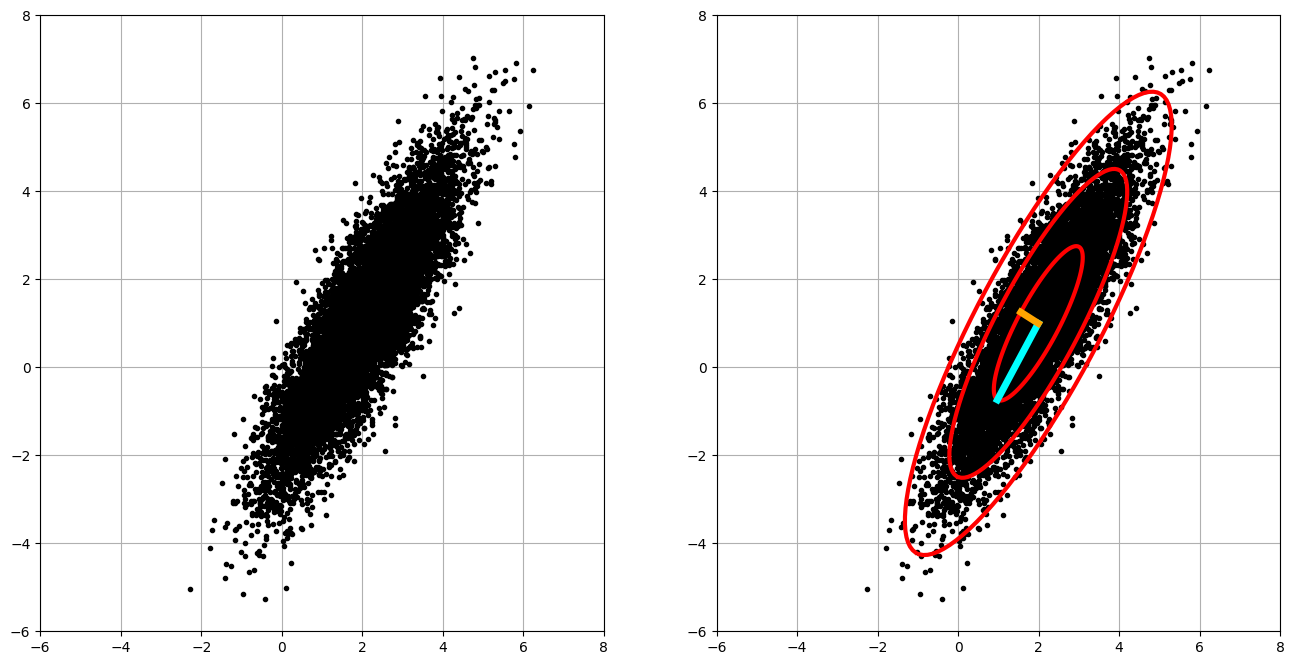

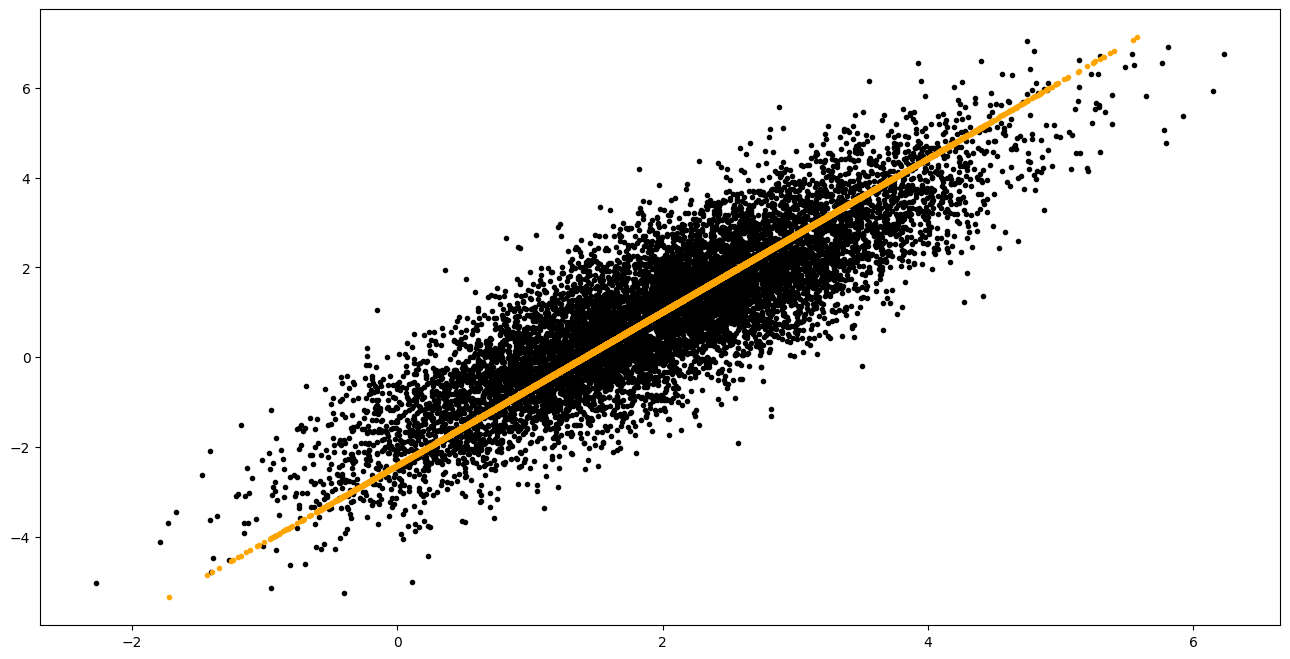

In [3]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 8]

xC = np.array([2, 1])      # Center of data (mean)
sig = np.array([2, 0.5])   # Principal axes

theta = np.pi/3            # Rotate cloud by pi/3

R = np.array([[np.cos(theta), -np.sin(theta)],     # Rotation matrix
              [np.sin(theta), np.cos(theta)]])

nPoints = 10000            # Create 10,000 points
X = R @ np.diag(sig) @ np.random.randn(2,nPoints) + np.diag(xC) @ np.ones((2,nPoints))

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(X[0,:],X[1,:], '.', color='k')
ax1.grid()
plt.xlim((-6, 8))
plt.ylim((-6,8))

Xavg = np.mean(X,axis=1)                  # Compute mean
Xmean = np.tile(Xavg,(nPoints,1)).T
B = X - Xmean        # Mean-subtracted data

# Find principal components (SVD)
U, S, VT = np.linalg.svd(B/np.sqrt(nPoints),full_matrices=False)

ax2 = fig.add_subplot(122)
ax2.plot(X[0,:],X[1,:], '.', color='k')   # Plot data to overlay PCA
ax2.grid()
plt.xlim((-6, 8))
plt.ylim((-6,8))

theta = 2 * np.pi * np.arange(0,1,0.01)

# 1-std confidence interval
Xstd = U @ np.diag(S)

circle = np.array([np.cos(theta),np.sin(theta)]) # points on a unit circle
Xstd = Xstd @ circle


ax2.plot(Xavg[0] + Xstd[0,:], Xavg[1] + Xstd[1,:],'-',color='r',linewidth=3)
ax2.plot(Xavg[0] + 2*Xstd[0,:], Xavg[1] + 2*Xstd[1,:],'-',color='r',linewidth=3)
ax2.plot(Xavg[0] + 3*Xstd[0,:], Xavg[1] + 3*Xstd[1,:],'-',color='r',linewidth=3)

# Plot principal components U[:,0]S[0] and U[:,1]S[1]
ax2.plot(np.array([Xavg[0], Xavg[0]+U[0,0]*S[0]]),
         np.array([Xavg[1], Xavg[1]+U[1,0]*S[0]]),'-',color='cyan',linewidth=5)
ax2.plot(np.array([Xavg[0], Xavg[0]+U[0,1]*S[1]]),
         np.array([Xavg[1], Xavg[1]+U[1,1]*S[1]]),'-',color='orange',linewidth=5)

plt.show()


# plt.plot(B[0,:],B[1,:], '.', color='k')
# plt.plot(X[0,:],X[1,:], '.', color='k')

X_recover = ((U @ np.diag(S))[:, :1] @ VT[:1]) * np.sqrt(nPoints)+ Xmean
# X_recover = ((U @ np.diag(S)) @ VT) * np.sqrt(nPoints) + Xmean
plt.plot(X[0,:],X[1,:], '.', color='k')
plt.plot(X_recover[0,:],X_recover[1,:], '.', color='orange')
plt.show()



In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import math

10000
tf.Tensor([1.9911703 1.01174  ], shape=(2,), dtype=float32)
Xmean:  tf.Tensor(
[[1.9911703 1.01174  ]
 [1.9911703 1.01174  ]
 [1.9911703 1.01174  ]
 ...
 [1.9911703 1.01174  ]
 [1.9911703 1.01174  ]
 [1.9911703 1.01174  ]], shape=(10000, 2), dtype=float32)
--------------------------------------------------
tf.Tensor([1.9876025  0.49706548], shape=(2,), dtype=float32)
tf.Tensor(
[[-0.01082873 -0.02052804]
 [ 0.00806224 -0.00407542]
 [-0.00353113 -0.00825139]
 ...
 [-0.01222517  0.00556322]
 [-0.01216363  0.00023392]
 [ 0.00810949  0.00240858]], shape=(10000, 2), dtype=float32)
tf.Tensor(
[[ 0.5022924  0.8646978]
 [-0.8646978  0.5022924]], shape=(2, 2), dtype=float32)


(-6.0, 8.0)

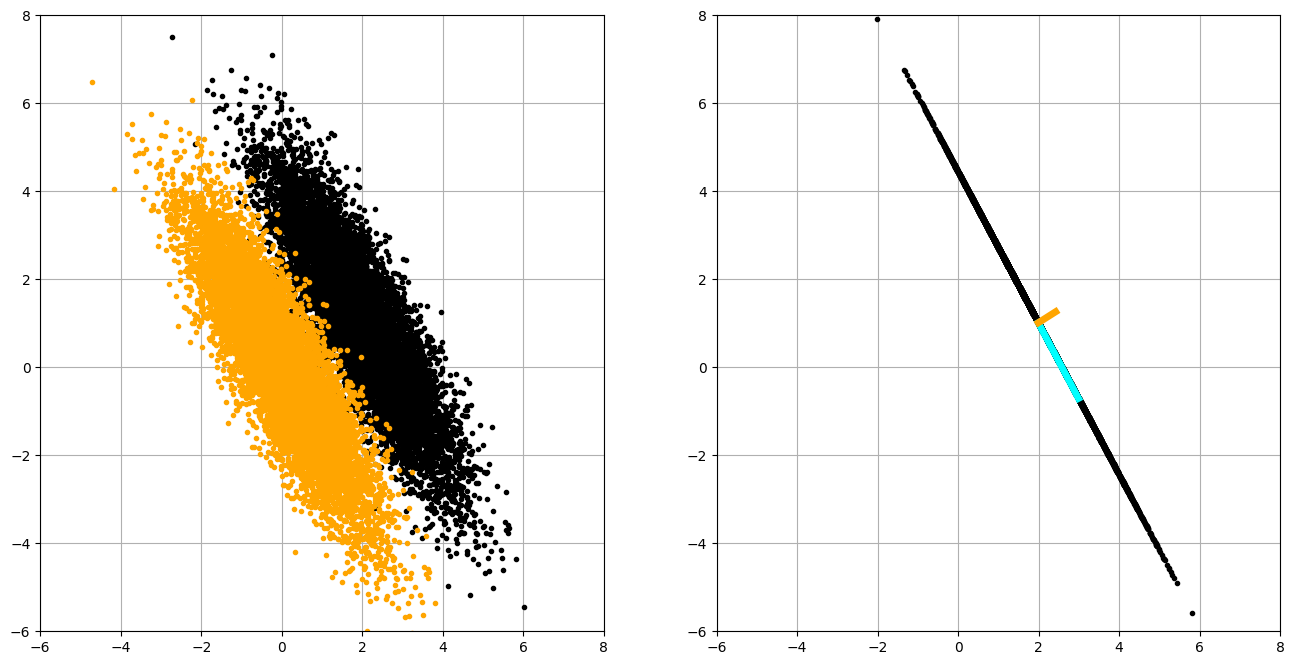

In [5]:

plt.rcParams['figure.figsize'] = [16, 8]

xC = tf.constant([2, 1], dtype=tf.float32)  # Center of data (mean)
sig = tf.constant([2, 0.5], dtype=tf.float32)  # Principal axes

# theta = tf.constant(math.pi, dtype=tf.float32) / 3  # Rotate cloud by pi/3
theta = tf.convert_to_tensor(math.pi / 3, dtype=tf.float32)  # Rotate cloud by pi/3
nPoints = 10000  # Create 10,000 points
print(nPoints)

R = tf.constant([[0.5, -0.8660254], [0.8660254, 0.5]])

randn = tf.random.normal(shape=(nPoints, 2), dtype=tf.float32)
X = randn @ (tf.linalg.diag(sig) @ R) +  tf.ones((nPoints, 2)) @ tf.linalg.diag(xC)

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(X[:, 0], X[:, 1], '.', color='k')
ax1.grid()
plt.xlim((-6, 8))
plt.ylim((-6, 8))


Xavg = tf.reduce_mean(X, axis=0)  # Compute mean
print(Xavg)
Xmean = tf.tile(tf.expand_dims(Xavg, axis=0), [nPoints, 1])  # Mean-subtracted data
print("Xmean: ", Xmean)
B = X - Xmean

ax1.plot(B[:, 0], B[:, 1], '.', color='orange')

B_scaled = B / np.sqrt(nPoints)
# B_scaled = B / tf.sqrt(tf.constant(nPoints, dtype=tf.float32))
# B_scaled = tf.transpose(B_scaled)
# print("B_scaled shape: ", B_scaled.shape)
# Find principal components (SVD)
S, U, V = tf.linalg.svd(B_scaled, full_matrices=False)

print("-" * 50)
print(S)
print(U)
print(V)

# principle components
# pc = tf.matmul(tf.linalg.diag(S), V, adjoint_b=True)
pc = tf.matmul(tf.linalg.diag(S), V, adjoint_b=True)

# X_recover = (U @ tf.matmul(tf.linalg.diag(S), V[:1], adjoint_b=True)) * np.sqrt(nPoints) + Xmean
# X_recover = (U @ tf.matmul(tf.linalg.diag(S), V, adjoint_b=True)) * np.sqrt(nPoints) + Xmean

X_recover = (U[:, :1] @ pc[:1, :]) * np.sqrt(nPoints) + Xmean
# X_recover = (U @ pc) * np.sqrt(nPoints) + Xmean
ax2 = fig.add_subplot(122)
# ax2.plot(X[:, 0], X[:, 1], '.', color='k')  # Plot data to overlay PCA
ax2.plot(X_recover[:, 0], X_recover[:, 1], '.', color='k')  # Plot data to overlay PCA


colors = ['cyan', 'orange']
for i, p in enumerate(pc):
    ax2.plot(np.array([Xavg[0], Xavg[0] + pc[i,0]]),
            np.array([Xavg[1], Xavg[1] + pc[i,1]]),'-',color=colors[i],linewidth=5)

ax2.grid()
plt.xlim((-6, 8))
plt.ylim((-6, 8))

# print(X)
# print(X_recover)

3 dimensions

10000
(10000, 3)
tf.Tensor([2.0231571 0.9704547 0.8145488], shape=(3,), dtype=float32)
Singular values:  tf.Tensor([2.1175523  0.64279276 0.15005505], shape=(3,), dtype=float32)
Principal components:  tf.Tensor(
[[-1.0307679e+00  1.7268776e+00 -6.6290158e-01]
 [-4.4627607e-01 -3.7196949e-01 -2.7506158e-01]
 [-7.9547785e-02  1.3573479e-03  1.2722746e-01]], shape=(3, 3), dtype=float32)
Reconstruction error:  0.0075055067
PC: : tf.Tensor(-1.0307679, shape=(), dtype=float32) tf.Tensor(1.7268776, shape=(), dtype=float32) tf.Tensor(-0.6629016, shape=(), dtype=float32)
PC: : tf.Tensor(-0.44627607, shape=(), dtype=float32) tf.Tensor(-0.3719695, shape=(), dtype=float32) tf.Tensor(-0.27506158, shape=(), dtype=float32)


(-6.0, 8.0)

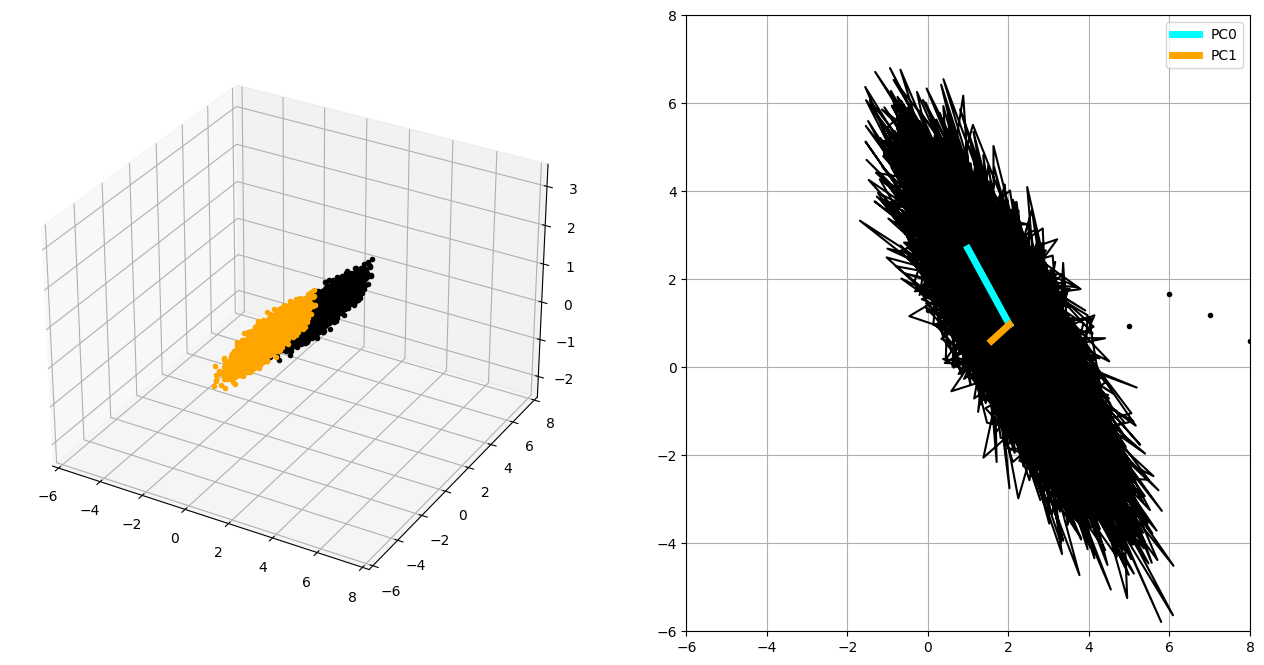

In [51]:
plt.rcParams['figure.figsize'] = [16, 8]

xC = tf.constant([2, 1, 0.8], dtype=tf.float32)  # Center of data (mean)
sig = tf.constant([2, 0.5, 0.3], dtype=tf.float32)  # Principal axes

# theta = tf.constant(math.pi, dtype=tf.float32) / 3  # Rotate cloud by pi/3
theta = tf.convert_to_tensor(math.pi / 3, dtype=tf.float32)  # Rotate cloud by pi/3
nPoints = 10000  # Create 10,000 points
print(nPoints)

R = tf.constant([[0.5, -0.8660254, 0.32], [0.8660254, 0.5, 0.32], [0.8660254, 0.5, 1]])

randn = tf.random.normal(shape=(nPoints, 3), dtype=tf.float32)
X = randn @ (tf.linalg.diag(sig) @ R) +  tf.ones((nPoints, 3)) @ tf.linalg.diag(xC)
print(X.shape)

fig = plt.figure()
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(X[:, 0], X[:, 1], X[:, 2],'.', color='k')
ax1.grid()
plt.xlim((-6, 8))
plt.ylim((-6, 8))

Xavg = tf.reduce_mean(X, axis=0)  # Compute mean
print(Xavg)
Xmean = tf.tile(tf.expand_dims(Xavg, axis=0), [nPoints, 1])  # Mean-subtracted data

B = X - Xmean

ax1.plot(B[:, 0], B[:, 1], B[:, 2], '.', color='orange')

B_scaled = B / np.sqrt(nPoints)
S, U, V = tf.linalg.svd(B_scaled, full_matrices=False)
print("Singular values: ", S)
pc = tf.matmul(tf.linalg.diag(S), V, adjoint_b=True)
print("Principal components: ", pc)
k_dims = 2
pc = pc[:k_dims, :]
X_recover = (U[:, :k_dims] @ pc[:k_dims, :]) * np.sqrt(nPoints) + Xmean
# X_recover = (U @ pc) * np.sqrt(nPoints) + Xmean
# ax2 = fig.add_subplot(122, projection='3d')
ax2 = fig.add_subplot(122)
# ax2.plot(X[:, 0], X[:, 1], '.', color='k')  # Plot data to overlay PCA

is_3d = True
if is_3d:
    ax2.plot(X_recover[:, 0], X_recover[:, 1],'.', color='k')  # Plot data to overlay PCA
else:
    ax2.plot(X_recover[:, 0], X_recover[:, 1], X_recover[:, 2],'.', color='k')  # Plot data to overlay PCA

error = tf.keras.metrics.MeanSquaredError()(X, X_recover)
print("Reconstruction error: ", error.numpy())
colors = ['cyan', 'orange', 'pink']
for i, p in enumerate(pc):
    print("PC: :", pc[i,0], pc[i,1], pc[i,2])
    if is_3d:
        ax2.plot(np.array([Xavg[0], Xavg[0] + p[0]]),
                np.array([Xavg[1], Xavg[1] + p[1]]),
                np.array([Xavg[2], Xavg[2] + p[2]]),
                '-',color=colors[i],linewidth=5, label=f"PC{i}")
    else:
        ax2.plot(np.array([Xavg[0], Xavg[0] + p[0]]),
                np.array([Xavg[1], Xavg[1] + p[1]]),
                '-',color=colors[i],linewidth=5, label=f"PC{i}")
 

ax2.grid()
ax2.legend()
plt.xlim((-6, 8))
plt.ylim((-6, 8))


[0 3]


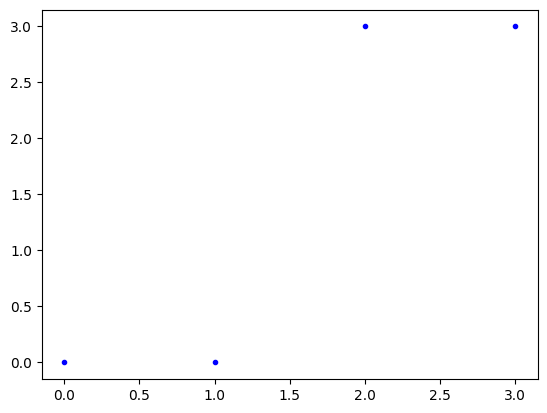

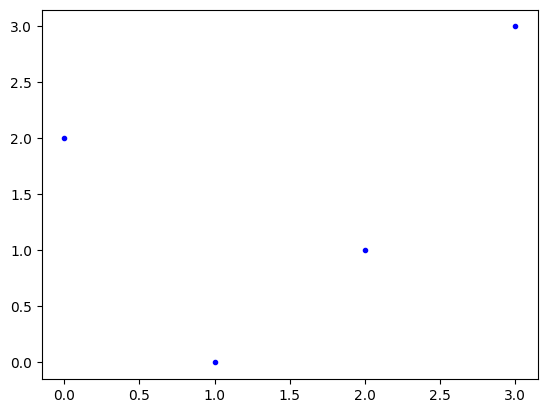

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


xs = np.array([[0, 1], [2, 3]])
ys = np.array([[2, 0], [1, 3]])

print(ys[:, 1])
plt.plot(xs, ys[:, 1], 'b.')
plt.show()

xs = np.array([0, 1, 2, 3])
ys = np.array([2, 0, 1, 3])

plt.plot(xs, ys, 'b.')
plt.show()
